### LightGBM 적용 - 위스콘신 Breast Cancer Prediction

In [5]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMlassifier 임포트

from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

datasets = load_breast_cancer()

cancer_df = pd.DataFrame(data=datasets.data,columns=datasets.feature_names)
cancer_df['target'] = datasets.target

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X_feature = cancer_df.iloc[:,:-1]
y_labels = cancer_df.iloc[:,-1]

# 전체 데이터중 80%는 학습용 20%는 테스트용으로 데이터 추출
X_train,X_test,y_train,y_test = train_test_split(X_feature,y_labels,test_size=0.2)
# 웨에서 만든 X_train,y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.1)

# 앞서 XGBoost와 동일하게 n_estimator는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400,learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_tr,y_tr),(X_val,y_val)]
lgbm_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50,eval_metric='logloss',eval_set=evals,verbose=True)
preds=lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.607329	valid_1's binary_logloss: 0.688982
[2]	training's binary_logloss: 0.572741	valid_1's binary_logloss: 0.643759
[3]	training's binary_logloss: 0.539785	valid_1's binary_logloss: 0.601716
[4]	training's binary_logloss: 0.51196	valid_1's binary_logloss: 0.562336
[5]	training's binary_logloss: 0.48616	valid_1's binary_logloss: 0.528157
[6]	training's binary_logloss: 0.461336	valid_1's binary_logloss: 0.497692
[7]	training's binary_logloss: 0.438356	valid_1's binary_logloss: 0.468291
[8]	training's binary_logloss: 0.418598	valid_1's binary_logloss: 0.442229
[9]	training's binary_logloss: 0.399374	valid_1's binary_logloss: 0.421852
[10]	training's binary_logloss: 0.381323	valid_1's binary_logloss: 0.398073
[11]	training's binary_logloss: 0.364662	valid_1's binary_logloss: 0.376174
[12]	training's binary_logloss: 0.349158	valid_1's binary_logloss: 0.359727
[13]	training's binary_logloss: 0.334707	valid_1's binary_logloss: 0.340709
[14]	training's binary_

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score

def get_clf_eval(y_test,pred,pred_proba):
    confusion =confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
get_clf_eval(y_test,preds,pred_proba)

오차행렬
[[46  1]
 [ 1 66]]
정확도: 0.9825, 정밀도: 0.9851, 재현율: 0.9851,    F1: 0.9851, AUC:0.9930


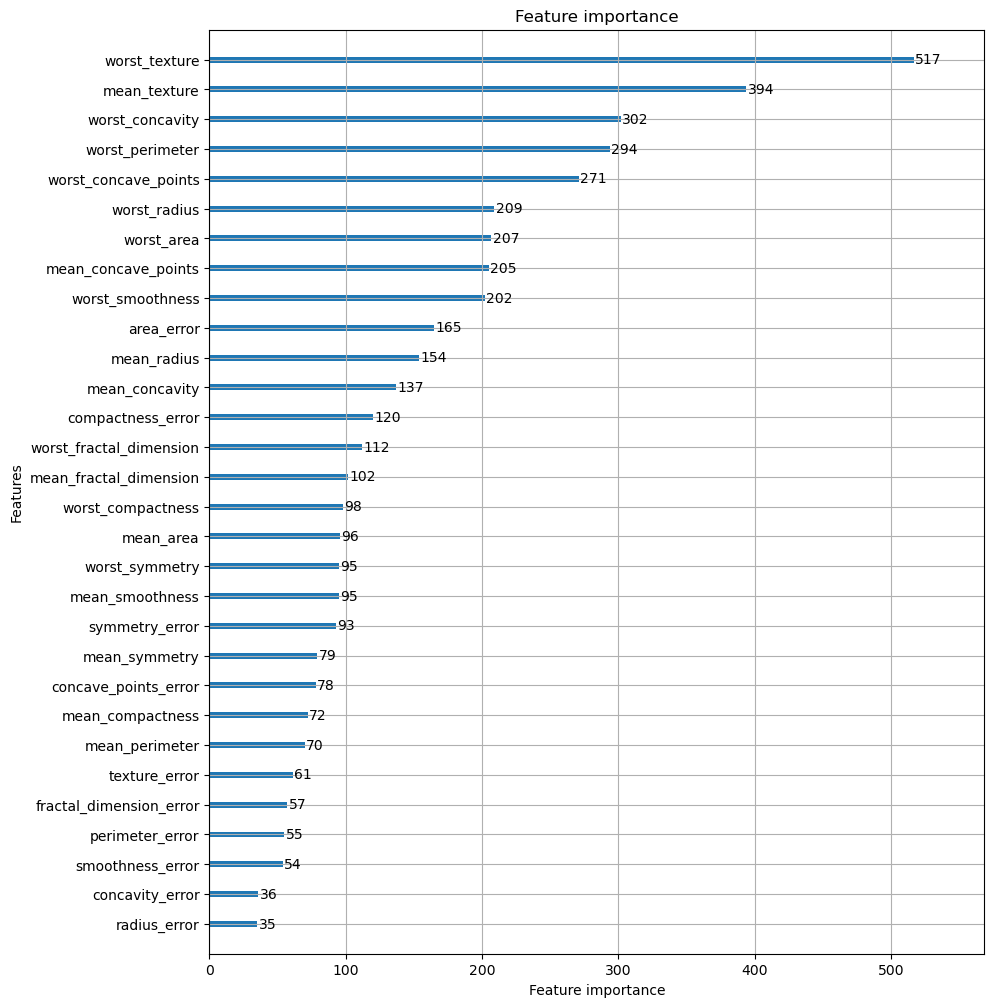

In [12]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)
plt.show()